In [ ]:
import pandas as pd
import ast

## Preprocess Diyetkolik 

In [ ]:
df = pd.read_excel("data/diyetkolik_recipes.xlsx", index_col=0)

In [ ]:
def parse_string_as_list(string):
    try:
        return ast.literal_eval(string)
    except (ValueError, SyntaxError):
        return string

In [ ]:
df.Ingredients= df.Ingredients.apply(parse_string_as_list)

In [ ]:
ing_counts = dict()

for row in df.Ingredients:
    for ing in row:
        if ing not in ing_counts.keys():
            ing_counts[ing] = 1
        else:
            ing_counts[ing] += 1     

In [ ]:
for ing, count in list(ing_counts.items()):
    if count < 15:
        del ing_counts[ing]

In [ ]:
new_df = pd.DataFrame(0, index=df.index, columns=ing_counts.keys())

In [ ]:
for index, recipe in df.iterrows():
    ingredients = recipe["Ingredients"]
    for ingredient in ingredients:
        if ingredient in new_df.columns.values:
            new_df.at[index,ingredient] = 1

In [ ]:
new_df = new_df[ing_counts.keys()][0:1325]

## Cluster With FINCH

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from finch import FINCH
import pandas as pd
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_excel("data/synthetic_dataset.xlsx", index_col=0)

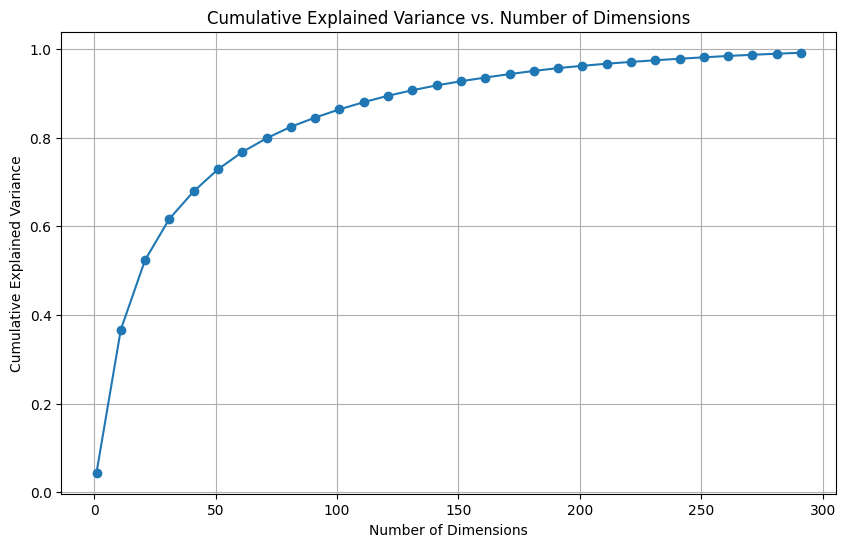

In [3]:
# The range of dimensions to evaluate
max_dim = 300
step = 10
dims = range(1, max_dim, step)

explained_variances = []
for n_components in dims:
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    svd.fit(df)
    explained_variances.append(svd.explained_variance_ratio_.sum())

plt.figure(figsize=(10, 6))
plt.plot(dims, explained_variances, marker='o')
plt.xlabel('Number of Dimensions')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Dimensions')
plt.grid(True)
plt.show()

In [4]:
n_components = 200  
svd = TruncatedSVD(n_components=n_components, random_state=42)
data_reduced = svd.fit_transform(df)

In [5]:
c, num_clust, req_c = FINCH(data_reduced)

Partition 0: 10998 clusters
Partition 1: 1431 clusters
Partition 2: 198 clusters
Partition 3: 34 clusters
Partition 4: 7 clusters
Partition 5: 3 clusters


In [6]:
for i in range(0,6):
    silhouette_avg = silhouette_score(df, pd.DataFrame(c)[i])
    print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: -0.03260809228856065
Silhouette Score: -0.07449853784095947
Silhouette Score: -0.06327222976394305
Silhouette Score: -0.04839919881335113
Silhouette Score: -0.0214714708209513


In [7]:
pd.DataFrame(c)[4]

0        0
1        0
2        0
3        1
4        0
        ..
69260    3
69261    0
69262    0
69263    1
69264    0
Name: 4, Length: 69265, dtype: int32